# OASIS INFOBYTE INTERNSHIP

# Name of Intern - Dattatray Bodake

# TASK-1 IRIS FLOWER CLASSIFICATION 

# Problem Statement -

Develop a machine learning model to classify iris flowers into different species based on their measurements. The goal is to accurately predict the species of an iris flower given its sepal length, sepal width, petal length, and petal width.

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import joblib
import pickle
import matplotlib_inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#shows top 5 rows 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#shows last 5 rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Explore Dataset

In [7]:
#all dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#size of the dataset
iris.shape

(150, 6)

In [9]:
#summary statistics of the numerical columns
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#checking all dtypes
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
#checking null values
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Preprocess Dataset

In [12]:
#Drop the Id column from data set because no need of Id feature model building.
iris.drop('Id',axis=1, inplace=True)

In [13]:
#cheking duplicates values
iris.duplicated().sum()

3

In [14]:
iris[iris.duplicated(keep=False)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [15]:
iris.drop_duplicates(inplace=True)

In [16]:
#unique values for each features
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [17]:
new_column_names ={'SepalLengthCm':'Sepal Length(cm)','SepalWidthCm':'Sepal Width(cm)','PetalLengthCm':'Petal Length(cm)','PetalWidthCm':'Petal Width(cm)'}
iris = iris.rename(columns=new_column_names)
iris.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris.columns

Index(['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)',
       'Petal Width(cm)', 'Species'],
      dtype='object')

In [19]:
features = ['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)', 'Petal Width(cm)','Species']

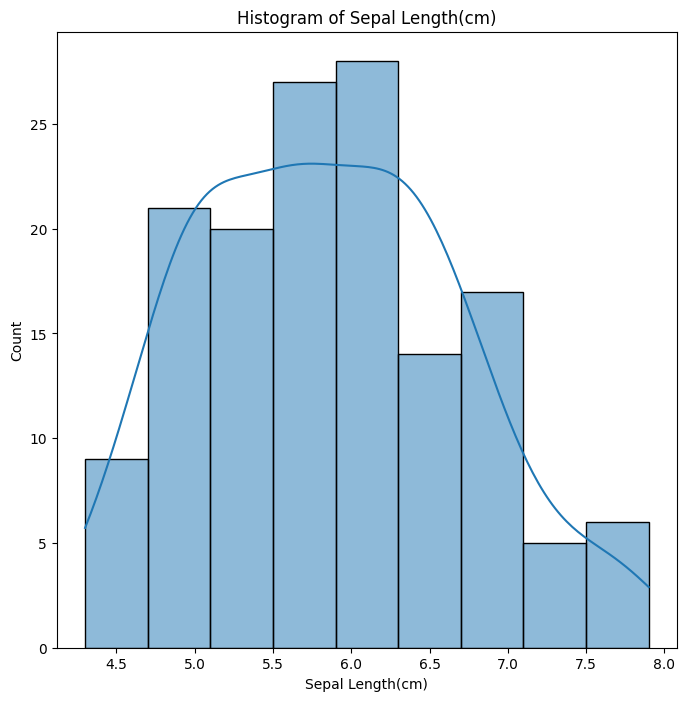

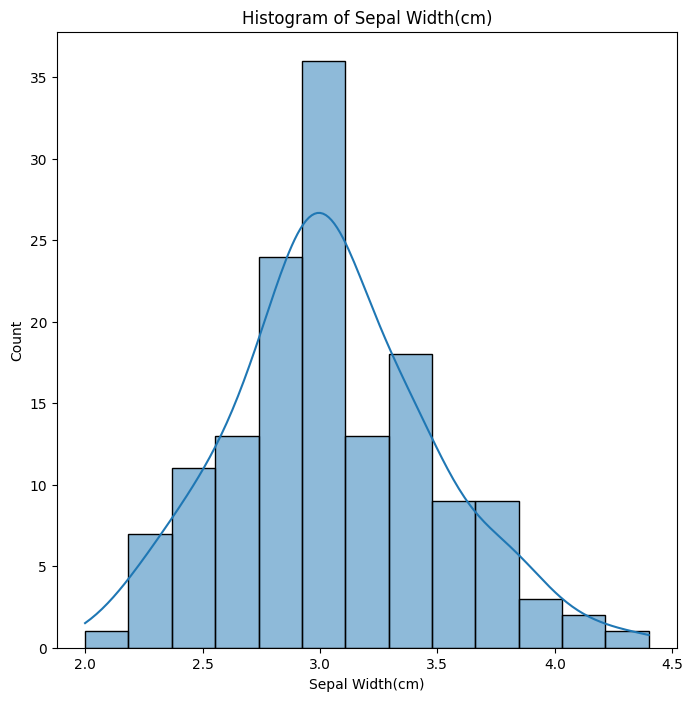

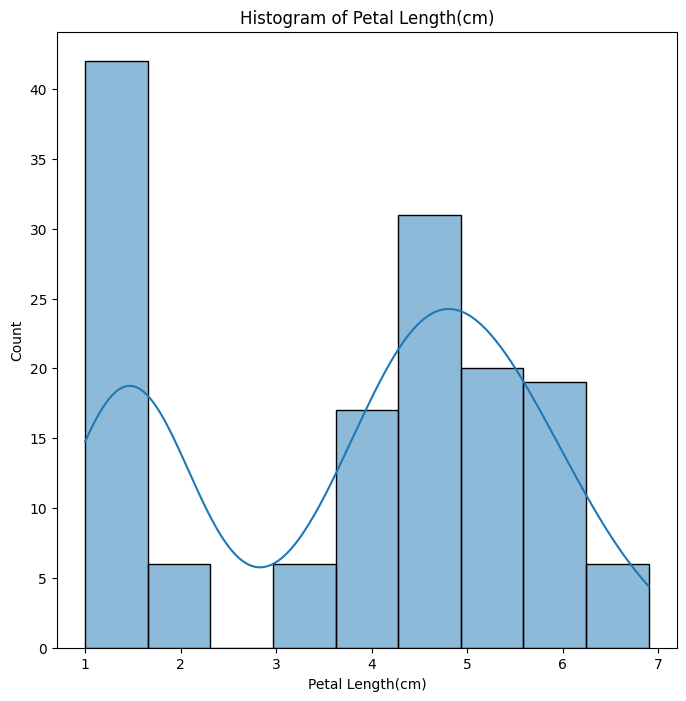

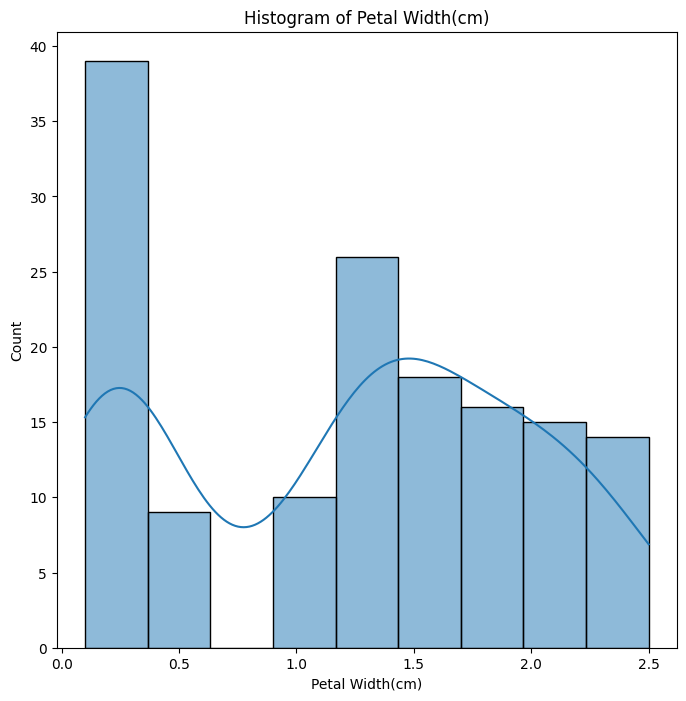

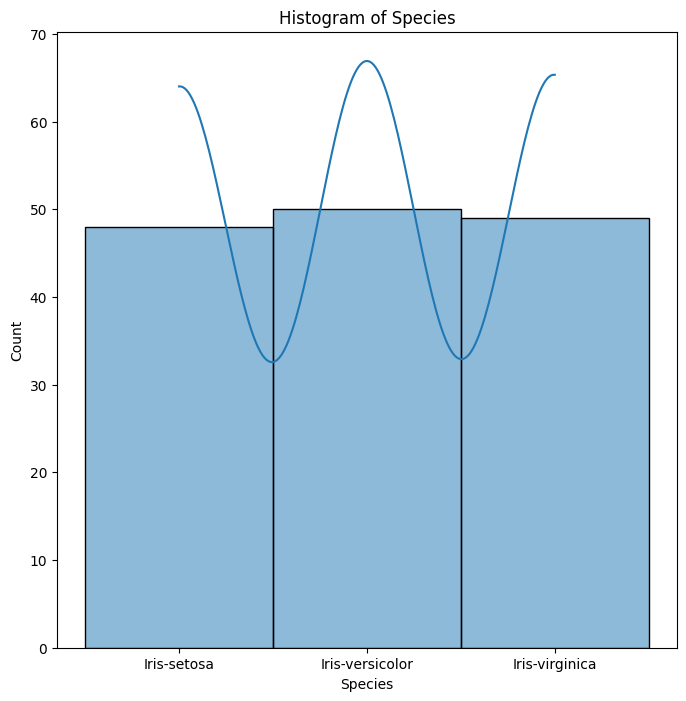

In [20]:
#To visualize the distribution of each feature, create histograms using Matplotlib
for feature in features:
    plt.figure(figsize=(8,8))
    sns.histplot(iris[feature],kde =True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

In [21]:
y = iris['Species']

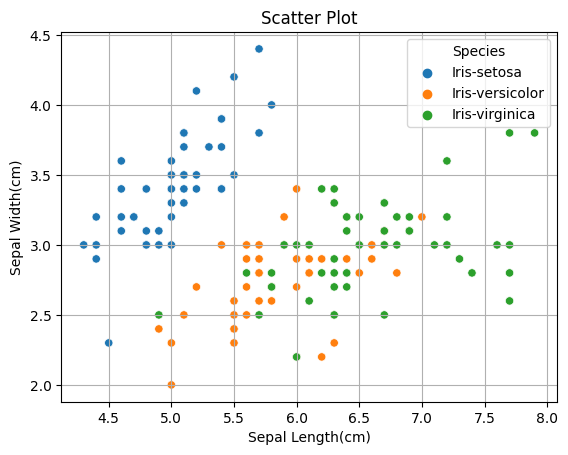

In [22]:
#to visualize the relationships between features, you can create scatter plots using Matplotlib
sns.scatterplot(data=iris,x ='Sepal Length(cm)',y='Sepal Width(cm)',hue='Species')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

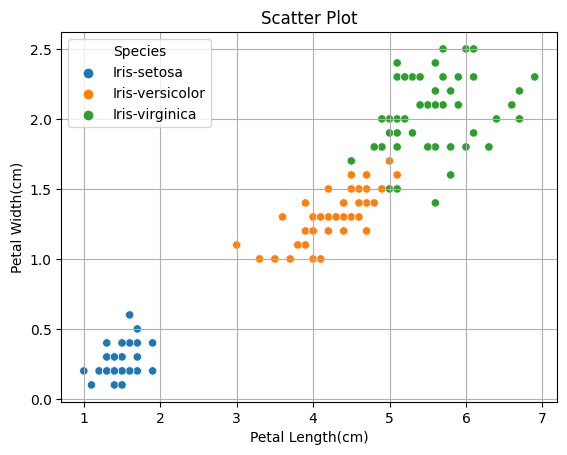

In [23]:
sns.scatterplot(data=iris,x ='Petal Length(cm)',y='Petal Width(cm)',hue='Species')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

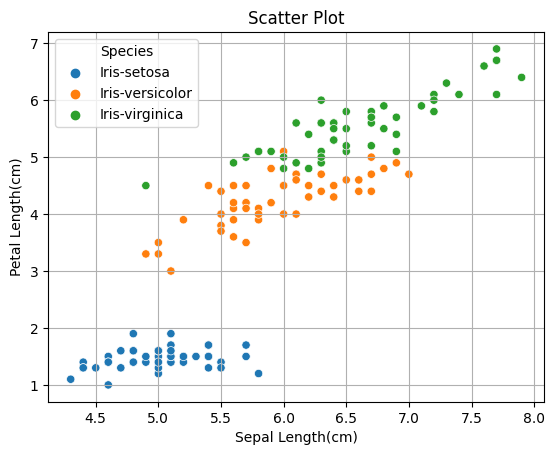

In [24]:
sns.scatterplot(data=iris,x ='Sepal Length(cm)',y='Petal Length(cm)',hue='Species')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Length(cm)')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

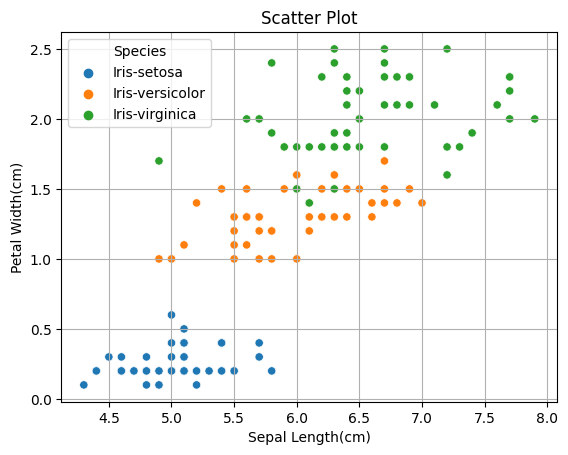

In [25]:
sns.scatterplot(data=iris,x ='Sepal Length(cm)',y='Petal Width(cm)',hue='Species')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

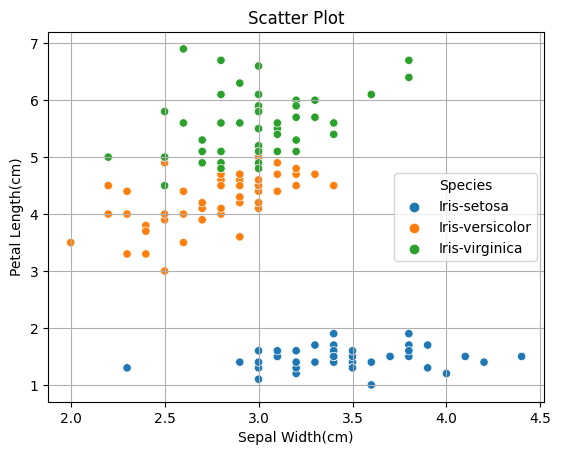

In [26]:
sns.scatterplot(data=iris,x ='Sepal Width(cm)',y='Petal Length(cm)',hue='Species')
plt.xlabel('Sepal Width(cm)')
plt.ylabel('Petal Length(cm)')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

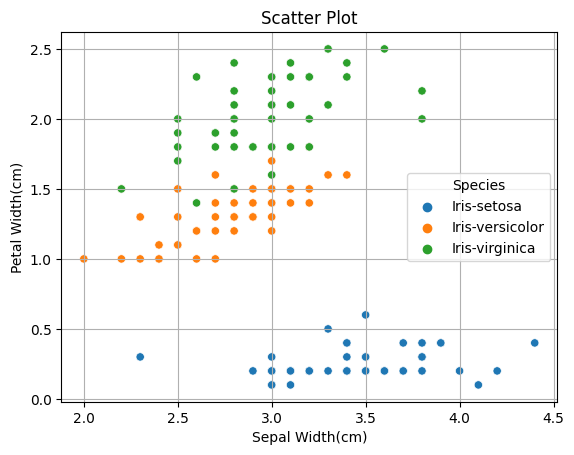

In [27]:
sns.scatterplot(data=iris,x ='Sepal Width(cm)',y='Petal Width(cm)',hue='Species')
plt.xlabel('Sepal Width(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

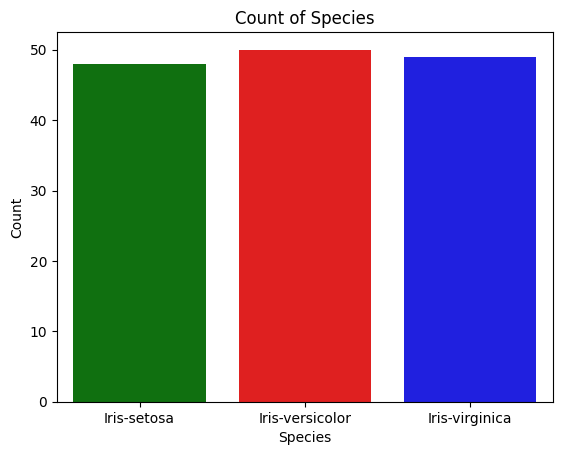

In [28]:
#countplot for species
color_pallete = ['Green','Red','Blue']
sns.countplot(data=iris,x = y,palette=color_pallete)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species')
plt.show()

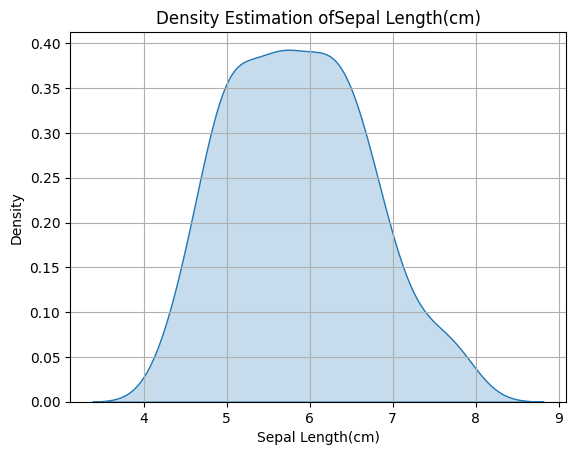

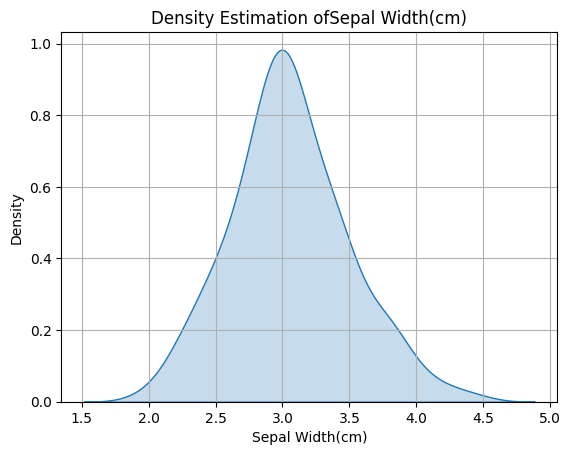

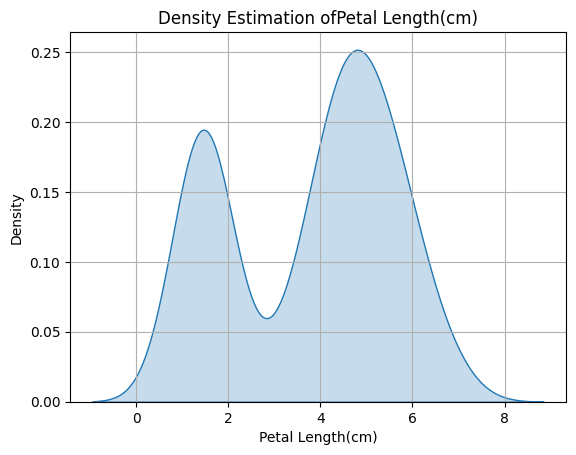

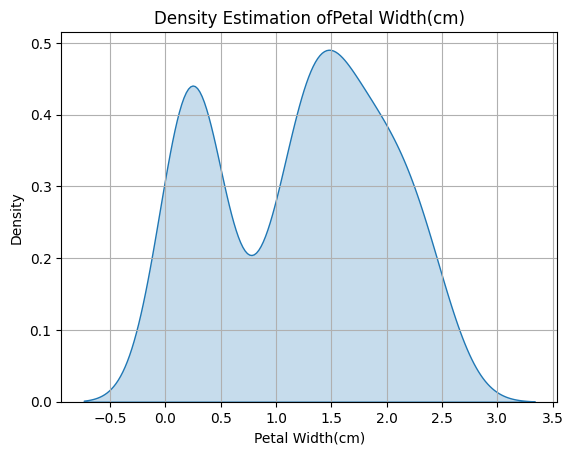

In [29]:
#Iterate over each column
for feature in iris.columns[:-1]:
    sns.kdeplot(data=iris,x = feature,fill=True,shade=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Density Estimation of{feature}')
    plt.grid(True)
    plt.show()

<Axes: >

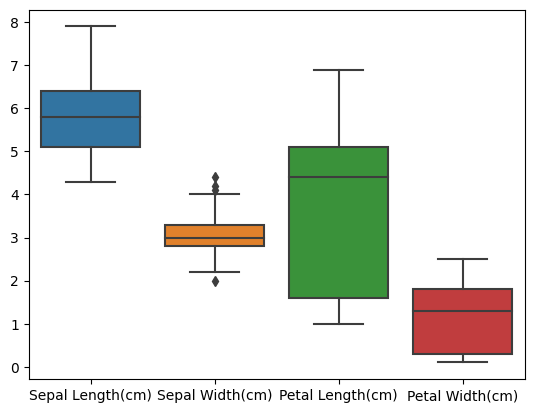

In [30]:
sns.boxplot(data=iris)

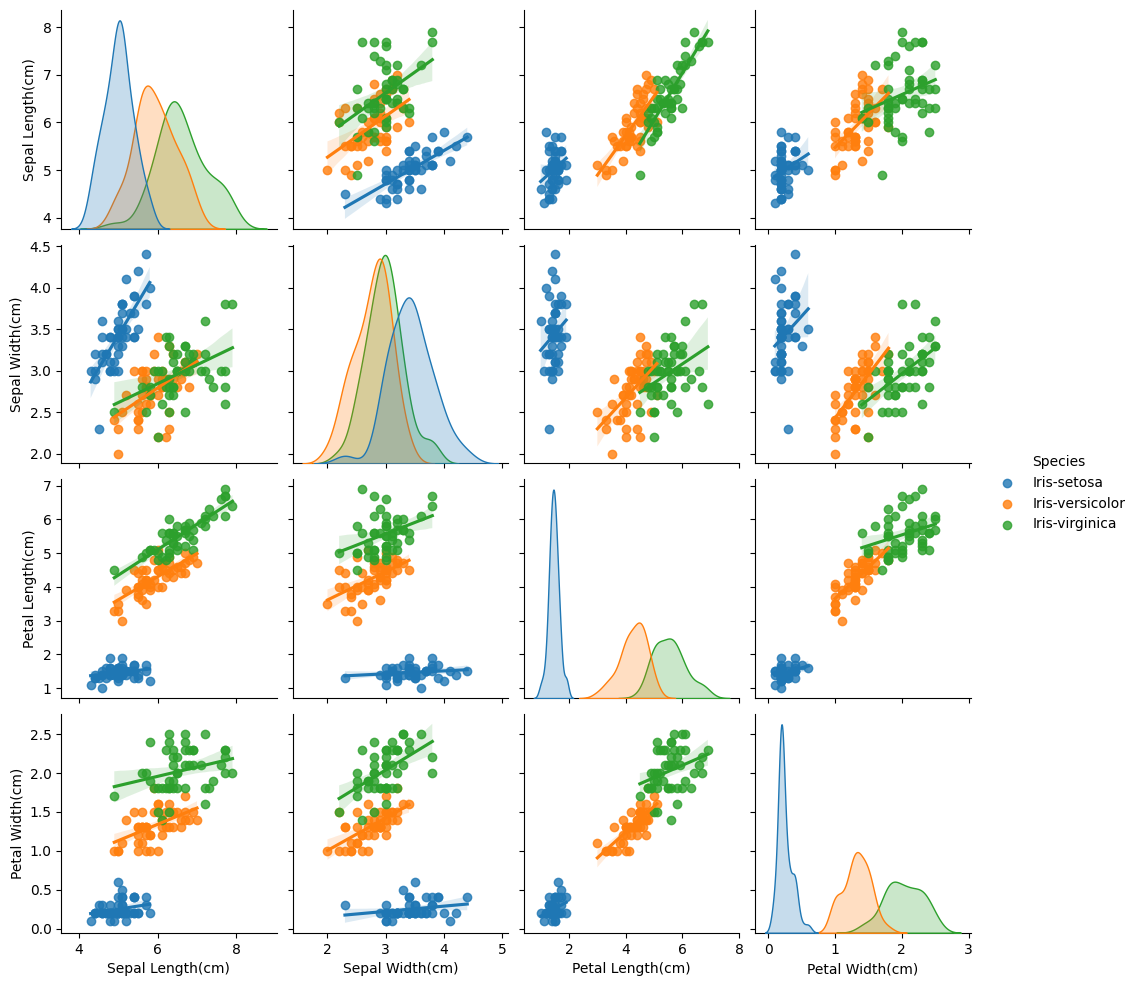

In [31]:
sns.pairplot(data=iris,hue='Species',kind='reg')

In [32]:
#Correlation

In [33]:
correlation = iris.corr()
correlation

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm)
Sepal Length(cm),1.000000,-0.109321,0.871305,0.817058
Sepal Width(cm),-0.109321,1.000000,-0.421057,-0.356376
Petal Length(cm),0.871305,-0.421057,1.000000,0.961883
Petal Width(cm),0.817058,-0.356376,0.961883,1.000000


<Axes: >

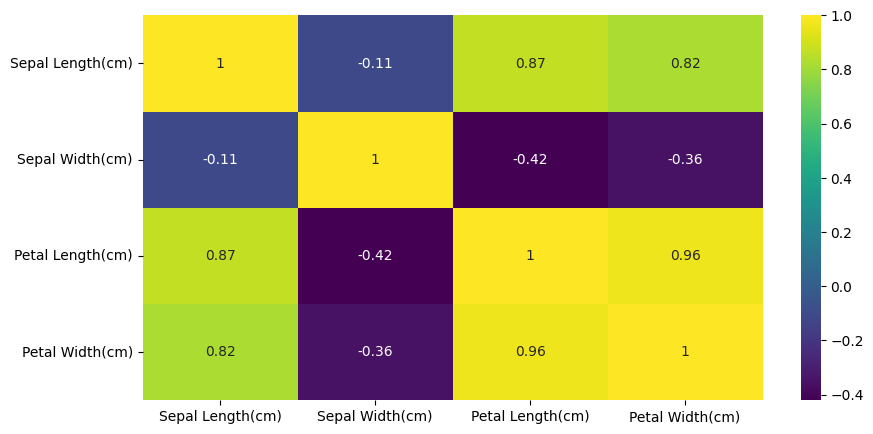

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap='viridis')

In [35]:
iris.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#Label Encoding
y=iris['Species']

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_labled = le.fit_transform(y)
y_labled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
iris['Species'] = y_labled
iris

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Splitting Data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)

In [42]:
xtrain.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm)
120,6.9,3.2,5.7,2.3
17,5.1,3.5,1.4,0.3
113,5.7,2.5,5.0,2.0
80,5.5,2.4,3.8,1.1
71,6.1,2.8,4.0,1.3


In [43]:
xtest.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm)
101,5.8,2.7,5.1,1.9
95,5.7,3.0,4.2,1.2
56,6.3,3.3,4.7,1.6
105,7.6,3.0,6.6,2.1
100,6.3,3.3,6.0,2.5


In [44]:
ytrain.head()

120    2
17     0
113    2
80     1
71     1
Name: Species, dtype: int32

In [45]:
ytest.head()

101    2
95     1
56     1
105    2
100    2
Name: Species, dtype: int32

# Model Building

# 1) Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
#choose the model
model_1 = LogisticRegression()

In [47]:
#train the model
model_1.fit(xtrain,ytrain)

LogisticRegression()

In [48]:
#evaluate
y_pred = model_1.predict(xtest)

In [49]:
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: ",accuracy*100)

precision = precision_score(ytest,y_pred,average='weighted')
print(f"Precision: ",precision*100)

recall = recall_score(ytest,y_pred,average='weighted')
print(f"Recall: ",recall*100)

F1_score = f1_score(ytest,y_pred,average='weighted')
print(f"F1_score: ",F1_score*100)

Accuracy:  94.5945945945946
Precision:  94.5945945945946
Recall:  94.5945945945946
F1_score:  94.5945945945946


# 2) Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model_2 = RandomForestClassifier()

In [52]:
model_2.fit(xtrain,ytrain)

RandomForestClassifier()

In [53]:
y_pred = model_2.predict(xtest)

In [54]:
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: ",accuracy*100)

precision = precision_score(ytest,y_pred,average='weighted')
print(f"Precision: ",precision*100)

recall = recall_score(ytest,y_pred,average='weighted')
print(f"Recall: ",recall*100)

F1_score = f1_score(ytest,y_pred,average='weighted')
print(f"F1_score: ",F1_score*100)

Accuracy:  91.8918918918919
Precision:  92.03229203229203
Recall:  91.8918918918919
F1_score:  91.86577882230058


# 3) KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model_3 = KNeighborsClassifier()

In [57]:
model_3.fit(xtrain,ytrain)

KNeighborsClassifier()

In [58]:
y_pred = model_3.predict(xtest)

In [59]:
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: ",accuracy*100)

precision = precision_score(ytest,y_pred,average='weighted')
print(f"Precision: ",precision*100)

recall = recall_score(ytest,y_pred,average='weighted')
print(f"Recall: ",recall*100)

F1_score = f1_score(ytest,y_pred,average='weighted')
print(f"F1_score: ",F1_score*100)

Accuracy:  97.2972972972973
Precision:  97.50519750519751
Recall:  97.2972972972973
F1_score:  97.2972972972973


# 4) Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model_4 = DecisionTreeClassifier()

In [62]:
model_4.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [63]:
y_pred = model_4.predict(xtest)

In [64]:
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: ",accuracy*100)

precision = precision_score(ytest,y_pred,average='weighted')
print(f"Precision: ",precision*100)

recall = recall_score(ytest,y_pred,average='weighted')
print(f"Recall: ",recall*100)

F1_score = f1_score(ytest,y_pred,average='weighted')
print(f"F1_score: ",F1_score*100)

Accuracy:  91.8918918918919
Precision:  92.03229203229203
Recall:  91.8918918918919
F1_score:  91.86577882230058


# 5) SVC

In [65]:
from sklearn.svm import SVC

In [66]:
model_5 = SVC()

In [67]:
model_5.fit(xtrain,ytrain)

SVC()

In [68]:
y_pred = model_5.predict(xtest)

In [69]:
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: ",accuracy*100)

precision = precision_score(ytest,y_pred,average='weighted')
print(f"Precision: ",precision*100)

recall = recall_score(ytest,y_pred,average='weighted')
print(f"Recall: ",recall*100)

F1_score = f1_score(ytest,y_pred,average='weighted')
print(f"F1_score: ",F1_score*100)

Accuracy:  94.5945945945946
Precision:  94.5945945945946
Recall:  94.5945945945946
F1_score:  94.5945945945946


# Model Comparison

In [70]:
models = [
    ('Logistic Regression',LogisticRegression()),
    ('Random Forest Classifier',RandomForestClassifier()),
    ('K-Nearest Neighbors',KNeighborsClassifier()),
    ('Decision Tree Classifier',DecisionTreeClassifier()),
    ('SVM',SVC())]

In [71]:
results = []
for name, model in models:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    results.append((name, accuracy))

In [72]:
df_result = pd.DataFrame(results,columns=['Models','Accuracy'])

In [73]:
df_result

,Models,Accuracy
0,Logistic Regression,0.945946
1,Random Forest Classifier,0.918919
2,K-Nearest Neighbors,0.972973
3,Decision Tree Classifier,0.918919
4,SVM,0.945946


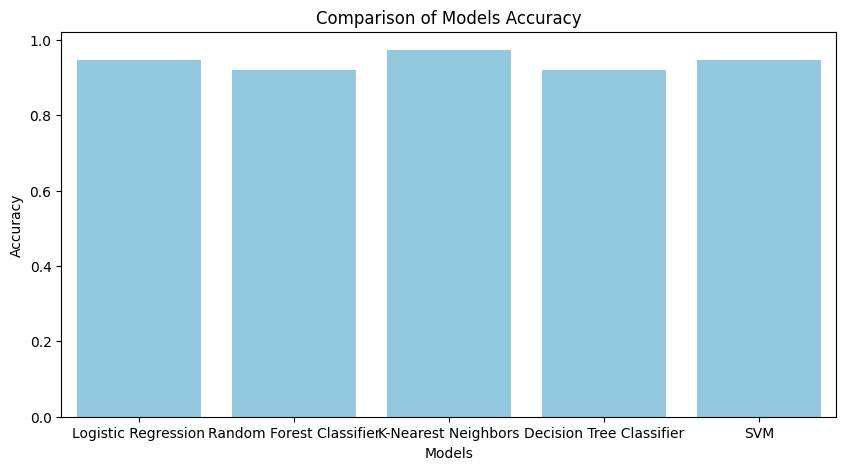

In [74]:
#Visualize Models Accuracy
plt.figure(figsize=(10,5))
sns.barplot(y='Accuracy',x='Models',data=df_result,color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models Accuracy')
plt.show()

# Hypertunning 

In [75]:
grid ={'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(estimator=model_3, param_grid=grid, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [76]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.972972972972973


# Predicition on New Unseen Data 

In [77]:
# Example unseen data
new_data = [[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [7.3, 2.9, 6.3, 1.8]]

In [78]:
#make prediction on new data
predictions = model_3.predict(new_data)

In [79]:
# Map the predicted labels to target names
target_names = iris['Species']
predicted_species = [target_names[prediction] for prediction in predictions]

# Print the predicted species
for data, species in zip(new_data, predicted_species):
    print(f"Data: {data} --> Predicted Species: {species}")

Data: [5.1, 3.5, 1.4, 0.2] --> Predicted Species: 0
Data: [6.2, 2.8, 4.8, 1.8] --> Predicted Species: 0
Data: [7.3, 2.9, 6.3, 1.8] --> Predicted Species: 0


# Model Saving

In [80]:
import joblib

In [81]:
joblib.dump(model_3, 'knn.pkl')

['knn.pkl']

# Thank You!